In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pickle
#with open(file_name+'/transition.txt','rb') as fp:

with open('/content/drive/MyDrive/2022_SUMMER/Research_Burger/Picture/transition.txt','rb') as fp:
  haha = pickle.load(fp)
print(haha)

trans = np.zeros([2,3,2,2])
for indi,i in enumerate([2012,2021]):
  for indj,j in enumerate(['year','quater','month']):
    print(i,j,haha[i][j][0,0]/np.sum(haha[i][j][0]),haha[i][j][1,0]/np.sum(haha[i][j][1]))
    haha[i][j] = np.array([haha[i][j][0,0]/np.sum(haha[i][j][0]),haha[i][j][1,0]/np.sum(haha[i][j][1])])

    trans[indi,indj,:,0] = haha[i][j]
    trans[indi,indj,:,1] = 1-haha[i][j]
    print(trans[indi][indj])  
    print(np.linalg.matrix_power(trans[indi][indj], 100)[0])


{2012: {'year': array([[ 5,  3],
       [ 3, 23]]), 'quater': array([[ 18,   4],
       [  4, 113]]), 'month': array([[ 49,   4],
       [  4, 362]])}, 2021: {'year': array([[ 4,  3],
       [ 3, 24]]), 'quater': array([[ 17,   3],
       [  3, 116]]), 'month': array([[ 47,   3],
       [  3, 366]])}}
2012 year 0.625 0.11538461538461539
[[0.625      0.375     ]
 [0.11538462 0.88461538]]
[0.23529412 0.76470588]
2012 quater 0.8181818181818182 0.03418803418803419
[[0.81818182 0.18181818]
 [0.03418803 0.96581197]]
[0.15827338 0.84172662]
2012 month 0.9245283018867925 0.01092896174863388
[[0.9245283  0.0754717 ]
 [0.01092896 0.98907104]]
[0.1265956 0.8734044]
2021 year 0.5714285714285714 0.1111111111111111
[[0.57142857 0.42857143]
 [0.11111111 0.88888889]]
[0.20588235 0.79411765]
2021 quater 0.85 0.025210084033613446
[[0.85       0.15      ]
 [0.02521008 0.97478992]]
[0.1438849 0.8561151]
2021 month 0.94 0.008130081300813009
[[0.94       0.06      ]
 [0.00813008 0.99186992]]
[0.12009092 0.8

In [2]:
mk=1

# Initial 

In [3]:
import scipy.io
import numpy as np
file_name = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/CODE/TranslatePythonCode/'
#file_name = '/content/drive/MyDrive/tamu/BurgerResults/'
mat = scipy.io.loadmat(file_name + 'canadafastfood_resorted.mat')
data = mat['data']#[np.where(mtype_int==1)]
TimePeriod = len(np.unique(data[:,1]))
SamplePath = int(len(data)/TimePeriod)
print(TimePeriod,SamplePath)
print(data[:,0].reshape([TimePeriod,SamplePath]).T)

#% Labeling
MT = len(data)          #% Size of the dataset (M x T = 400 x 35 = 14000).#clusterid = np.int_(data[:,0])      % Unique market ID.
year = np.int_(data[:,1]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_aw  = np.int_(data[:,2]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_bk  = np.int_(data[:,3]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_hvy = np.int_(data[:,4]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_mcd = np.int_(data[:,5]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_wdy = np.int_(data[:,6]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_aw  = np.int_(data[:,7]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_bk  = np.int_(data[:,8]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_hvy = np.int_(data[:,9]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_mcd = np.int_(data[:,10]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_wdy = np.int_(data[:,11]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_aw  = np.int_(data[:,12]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_bk  = np.int_(data[:,13]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_hvy = np.int_(data[:,14]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_mcd = np.int_(data[:,15]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_wdy = np.int_(data[:,16]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_aw  = np.int_(data[:,17]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_bk  = np.int_(data[:,18]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_hvy = np.int_(data[:,19]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_mcd = np.int_(data[:,20]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_wdy = np.int_(data[:,21]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
pop = data[:,23].reshape([TimePeriod,SamplePath]).T.reshape(-1)
val = data[:,24].reshape([TimePeriod,SamplePath]).T.reshape(-1)
inc = data[:,25].reshape([TimePeriod,SamplePath]).T.reshape(-1)
fpop = data[:,27].reshape([TimePeriod,SamplePath]).T.reshape(-1)
finc = data[:,28].reshape([TimePeriod,SamplePath]).T.reshape(-1)
fval = data[:,29].reshape([TimePeriod,SamplePath]).T.reshape(-1)
mktfe = data[:,30].reshape([TimePeriod,SamplePath]).T.reshape(-1) #% Market fixed effect estimates (from 130913_alaToivanenWaterson3_Fixedeffect3quantile.csv/dta)
tertile = np.int_(data[:,31]).reshape([TimePeriod,SamplePath]).T.reshape(-1)       #% Market type initial guess (from 130913_alaToivanenWaterson3_Fixedeffect3quantile.csv/dta)

35 400
[[  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 [  3.   3.   3. ...   3.   3.   3.]
 ...
 [398. 398. 398. ... 398. 398. 398.]
 [399. 399. 399. ... 399. 399. 399.]
 [400. 400. 400. ... 400. 400. 400.]]


In [4]:
def quantile(x,p):
  x = np.sort(x)
  n = len(x)
  x = np.hstack([x[0], x,x[-1]])
  i = p*n+1.5
  iu = int(np.ceil(i))
  il = int(np.floor(i))
  d = i-il
  qq = x[il-1]*(1-d)+x[iu-1]*d
  return qq

#% Number of own shops (in state space; capped at 3), from the perspective of each firm
Ni_aw = (N_aw <= 3)*N_aw + (N_aw > 3)*3
Ni_bk = (N_bk <= 3)*N_bk + (N_bk > 3)*3
Ni_hvy = (N_hvy <= 3)*N_hvy + (N_hvy > 3)*3
Ni_mcd = (N_mcd <= 3)*N_mcd + (N_mcd > 3)*3
Ni_wdy = (N_wdy <= 3)*N_wdy + (N_wdy > 3)*3

#% Number of rival shops (in state space; capped at 3), from the perspective of each firm
Nj_aw = N_bk + N_hvy + N_mcd + N_wdy
Nj_bk = N_aw + N_hvy + N_mcd + N_wdy
Nj_hvy = N_aw + N_bk + N_mcd + N_wdy
Nj_mcd = N_aw + N_bk + N_hvy + N_wdy
Nj_wdy = N_aw + N_bk + N_hvy + N_mcd
Nj_aw = (Nj_aw <= 3)*Nj_aw + (Nj_aw > 3)*3     
Nj_bk = (Nj_bk <= 3)*Nj_bk + (Nj_bk > 3)*3
Nj_hvy = (Nj_hvy <= 3)*Nj_hvy + (Nj_hvy > 3)*3
Nj_mcd = (Nj_mcd <= 3)*Nj_mcd + (Nj_mcd > 3)*3
Nj_wdy = (Nj_wdy <= 3)*Nj_wdy + (Nj_wdy > 3)*3

#% Number of pop,val,inc (in state space; capped at 3)
pop25 = quantile(pop,0.25)
val25 = quantile(val,0.25)   
inc25 = quantile(inc,0.25)  
pop50 = quantile(pop,0.5) 
val50 = quantile(val,0.5)   
inc50 = quantile(inc,0.5)  
pop75 = quantile(pop,0.75) 
val75 = quantile(val,0.75)   
inc75 = quantile(inc,0.75)   
disc_pop = np.int_(pop > pop25) + np.int_(pop > pop50) + np.int_(pop > pop75)  
disc_val = np.int_(val > val25) + np.int_(val > val50) + np.int_(val > val75)  
disc_inc = np.int_(inc > inc25) + np.int_( inc > inc50) + np.int_(inc > inc75)

#% Define state variables for each firm
RHS_aw = np.vstack([Ni_aw, Nj_aw, disc_pop,disc_val, disc_inc]).T#;         % State for A & W.      
RHS_bk = np.vstack([Ni_bk, Nj_bk, disc_pop,disc_val, disc_inc]).T#;         % State for Burger King.      
RHS_hvy = np.vstack([Ni_hvy, Nj_hvy, disc_pop,disc_val, disc_inc]).T#;      % State for Harvey's.      
RHS_mcd = np.vstack([Ni_mcd, Nj_mcd, disc_pop, disc_val,disc_inc]).T#;      % State for McDonald's.      
RHS_wdy = np.vstack( [Ni_wdy, Nj_wdy, disc_pop,disc_val, disc_inc]).T#;

In [5]:
stateID_aw = Ni_aw*4**4+Nj_aw*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_bk = Ni_bk*4**4+Nj_bk*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_hvy = Ni_hvy*4**4+Nj_hvy*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_mcd = Ni_mcd*4**4+Nj_mcd*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_wdy = Ni_wdy*4**4+Nj_wdy*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_other = np.hstack([stateID_aw,stateID_bk,stateID_hvy,stateID_wdy])

ai_aw = -1*np.int_(a_aw<0) + 0*np.int_(a_aw==0) + 1*np.int_(a_aw>0)+1
ai_bk = -1*np.int_(a_bk<0) + 0*np.int_(a_bk==0) + 1*np.int_(a_bk>0) +1
ai_hvy = -1*np.int_(a_hvy<0) + 0*np.int_(a_hvy==0) + 1*np.int_(a_hvy>0)+1
ai_mcd = -1*np.int_(a_mcd<0) + 0*np.int_(a_mcd==0) + 1*np.int_(a_mcd>0)+1
ai_wdy = -1*np.int_(a_wdy<0) + 0*np.int_(a_wdy==0) + 1*np.int_(a_wdy>0)+1
ai_other = np.hstack([ai_aw,ai_bk,ai_hvy,ai_wdy])

In [6]:
numstates = 5 # ni,nj,pop,val,inc
states_full = np.arange(4**numstates)
Ni = states_full//(4**(numstates-1))                       #Number of own outlets: {0,1,2,3+}.
Nj = states_full%(4**(numstates-1))//(4**(numstates-2))    #Number of rival outlets: {0,1,2,3+}.
dz1 = states_full%(4**(numstates-2))//(4**(numstates-3))   #Discretized population state: {0,1,2,3}.
dz2 = states_full%(4**(numstates-3))//(4**(numstates-4))   #Discretized property value state: {0,1,2,3}.
dz3 = states_full%(4**(numstates-4))                       #Discretized income state: {0,1,2,3}.
print(np.sum(np.abs(Ni*4**4+Nj*4**3+dz1*4**2+dz2*4**1+dz3-states_full)))
states = np.stack([Ni,Nj,dz1,dz2,dz3],axis=1)

0


In [7]:
import pandas as pd

real_gdp = np.array([3.1,1.6,6.0,8.1,4.7,-0.4,5.8,4.2,2.9,3.9,
                     2.9,3.6,-1.3,-1.5,5.9,5.7,3.7,2.1,5.4,2.8,
                     1.5,-3.2,0.9,1.8,3.5,4.5,0.7,3.4,4.6,4.1,
                     5.7,2.8,2.3,2.5,2.0,3.3])
real_emp = np.array([0.6,1.9,3.3,4.0,4.7,1.5,5.4,2.1,1.9,4.3,
                     3.7,3.3,-0.8,-3.1,3.3,2.8,3.5,1.9,4.0,2.4,
                     1.3,-2.1,-0.6,0.0,1.0,2.9,0.8,1.2,2.6,2.6,
                     2.8,1.5,1.1,3.4,1.6,1.3])
gdp_half = quantile(real_gdp,0.098)
print(gdp_half)
disc_gdp = np.int_(real_gdp >gdp_half)
disc_emp = np.int_(real_emp>0)
disc_inf = np.int_(pd.read_csv('/content/drive/MyDrive/2022_Fall/Research_Burger/INF_POSG/dataFull.csv')['disc_inf'].to_numpy())
print(disc_gdp)
obser = 2

trans_gdp = np.zeros([obser,obser],dtype=int)
trans_emp = np.zeros([obser,obser],dtype=int)
trans_inf = np.zeros([obser,obser],dtype=int)

for i in range(34):
  trans_gdp[disc_gdp[i],disc_gdp[i+1]] +=1
  trans_emp[disc_emp[i],disc_emp[i+1]] +=1
  trans_inf[disc_inf[0:35][i],disc_inf[0:35][i+1]] += 1

print(trans_gdp)
trans_gdp = trans_gdp/np.kron(np.ones([1,obser]),np.sum(trans_gdp,axis=1).reshape([-1,1]))
print(trans_gdp)
disc_gdp = (np.repeat(disc_gdp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)

print('################')
print(trans_emp)
trans_emp = trans_emp/np.kron(np.ones([1,obser]),np.sum(trans_emp,axis=1).reshape([-1,1]))
print(trans_emp)
disc_emp = (np.repeat(disc_emp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)

print('################')
print(disc_inf[0:35])
print(disc_inf[35:70])
print(trans_inf)
trans_inf = trans_inf/np.kron(np.ones([1,obser]),np.sum(trans_inf,axis=1).reshape([-1,1]))
print(trans_inf)
# disc_gdp = disc_inf

-0.3691999999999995
[1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 1  3]
 [ 3 27]]
[[0.25 0.75]
 [0.1  0.9 ]]
################
[[ 3  2]
 [ 2 27]]
[[0.6        0.4       ]
 [0.06896552 0.93103448]]
################
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[15  3]
 [ 3 13]]
[[0.83333333 0.16666667]
 [0.1875     0.8125    ]]


In [7]:
import pandas as pd
filename = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/Picture/'#file_name#
data_extra = pd.read_csv(filename+'ExtraData.csv')
print(data_extra.columns)
obser = 2

real_gdp = np.array([471872870332,528278532113,549252513808,579514590720,619128714024,639438135973,
                                  648781841143,686921326149,710538721592,736711479138,764052082628,
                                  780521511305,807637815073,781896281226,802236056858,849635830303,
                                  889886476676,908974292729,945996444330,987715937387,1010601111094,
                                  1012265294020,991148574826,1000071484628,1026681952590,1072825825744,
                                  1101727499074,1119566367656,1076515744633,1106620964735,1150559157996,
                                  1207140927611,1224107626383,1265998378652,1314246718196,1365686713015,1433914521108]) # Year 1969-2005 https://www.worldeconomics.com/GrossDomesticProduct/Real-GDP/Canada.aspx
              
real_gdp_growth1 =  (real_gdp[1:-1]-real_gdp[0:-2])/real_gdp[0:-2]
real_gdp_growth2 = (real_gdp[2:]-real_gdp[1:-1])/real_gdp[1:-1]
real_gdp_growth = (real_gdp_growth1+real_gdp_growth2)/2
gdp = real_gdp_growth1#data_extra['RealGDP_wb'].to_numpy()
print(gdp)
#gdp = real_gdp_growth
gdp_25 = 0.002#quantile(gdp,1/11)
gdp_75 = 1#quantile(gdp,1) 
print(gdp_25,gdp_75)
disc_gdp = np.int_((gdp > gdp_25)&(gdp<gdp_75)) #+ np.int_(gdp > gdp75) #np.int_(gdp>gdp50)#
trans_gdp = np.zeros([obser,obser],dtype=int)
print(disc_gdp)
for i in range(34):
  trans_gdp[disc_gdp[i],disc_gdp[i+1]] +=1
print(trans_gdp)
trans_gdp = trans_gdp/np.kron(np.ones([1,obser]),np.sum(trans_gdp,axis=1).reshape([-1,1]))
print(trans_gdp)
disc_gdp = (np.repeat(disc_gdp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)

print(gdp)

Index(['year', 'GDP_Grwoth_Rate', 'Inflation_Rate', 'Unemployment_Rate', 'GDP',
       'Government Budget', 'Government Debt', 'Medical Doctors',
       'Tip1_GDP_Grwoth_Rate', 'Tip2_GDP_Growth_Yearly',
       'Tip3_GDP_Growth_Annualy', 'Tip4_GDP_Growth_AVGAnnualy', 'Unnamed: 12',
       'Unemployment_Rate_GrowthRate', 'GDP_Growth_Yearly',
       'Medical_Doctors_Growth_Yearly', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'disc_gdp', 'disc_une', 'disc_inf', 'InflationRate_wb',
       'InflationRateLag_wb', 'InflationRateLag2_wb', 'IncInflationRate_wb',
       'IncInflationRateLag_wb', 'IncInflationRateLag2_wb', 'UneRate_wb',
       'UneRateLag_wb', 'UneRateLag2_wb', 'IncUneRate_wb', 'IncUneRateLag_wb',
       'IncUneRateLag2_wb', 'RealGDP_wb', 'GrowthRealGDP_wb', 'disc_InfInc',
       'disc_InfIncLag', 'disc_InfIncLag2', 'disc_UneInc', 'disc_UneIncLag',
       'disc_UneIncLag2', 'disc_RealGdpGrowth'],
      dtype='object')
[ 0.11953572  0.03970251  0.05509684  0.06835742  0.032

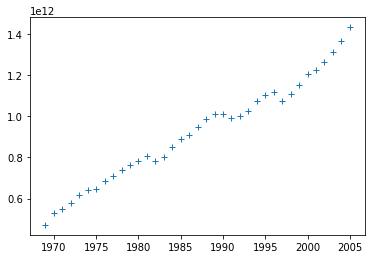

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(real_gdp))+1969,real_gdp,'+')

# Function

In [8]:
I = 2 #MCD and Other homogenous
J = 3 #Action: 0,1,2
NS = 4**(numstates)
NX = 15

##1. Global transtion F_Ni, F_dz1,F_dz2,F_dz3

In [11]:
#% F_Ni: Own # of shops changes deterministically, as follows
F_Ni = np.zeros([I,J,NX,NS,NS])#;
#for i in range(NX): 
F_Ni[0,0] = np.kron(np.array([[1]*4**4+[0]*4**4 + [0] *4**4+[0]*4**4]*4**4 +\
                          [[1]*4**4+[0]*4**4 + [0] *4**4+[0]*4**4]*4**4 + \
                          [[0]*4**4+[1]*4**4 + [0] *4**4+[0]*4**4]*4**4 + \
                          [[0]*4**4+[0]*4**4 + [1] *4**4+[0]*4**4]*4**4 ),np.ones([NX,1,1]))
F_Ni[0,1] =np.kron(np.array([[1]*4**4+[0]*4**4 + [0] *4**4+[0]*4**4]*4**4 +\
                          [[0]*4**4+[1]*4**4 + [0] *4**4+[0]*4**4]*4**4 + \
                          [[0]*4**4+[0]*4**4 + [1] *4**4+[0]*4**4]*4**4 + \
                          [[0]*4**4+[0]*4**4 + [0] *4**4+[1]*4**4]*4**4 ),np.ones([NX,1,1]))
F_Ni[0,2] = np.kron(np.array([[0]*4**4+[1]*4**4 + [0] *4**4+[0]*4**4]*4**4 +\
                          [[0]*4**4+[0]*4**4 + [1] *4**4+[0]*4**4]*4**4 + \
                          [[0]*4**4+[0]*4**4 + [0] *4**4+[1]*4**4]*4**4 + \
                          [[0]*4**4+[0]*4**4 + [0] *4**4+[1]*4**4]*4**4 ),np.ones([NX,1,1]))
F_Ni[1] = F_Ni[0]
# F_Ni[1:5,0,:,:] = np.stack([F_Ni[0,0,:,:],F_Ni[0,0,:,:],F_Ni[0,0,:,:],F_Ni[0,0,:,:]],axis=0)
# F_Ni[1:5,1,:,:] = np.stack([F_Ni[0,1,:,:],F_Ni[0,1,:,:],F_Ni[0,1,:,:],F_Ni[0,1,:,:]],axis=0)
# F_Ni[1:5,2,:,:] = np.stack([F_Ni[0,2,:,:],F_Ni[0,2,:,:],F_Ni[0,2,:,:],F_Ni[0,2,:,:]],axis=0)

disc_pop_mx = disc_pop[tertile==mk].reshape([-1,TimePeriod])
disc_pop_bk = disc_pop_mx[:,0:TimePeriod-1].reshape(-1)
disc_pop_fw = disc_pop_mx[:,1:TimePeriod].reshape(-1)
disc_val_mx = disc_val[tertile==mk].reshape([-1,TimePeriod])
disc_val_bk = disc_val_mx[:,0:TimePeriod-1].reshape(-1)
disc_val_fw = disc_val_mx[:,1:TimePeriod].reshape(-1)
disc_inc_mx = disc_inc[tertile==mk].reshape([-1,TimePeriod])
disc_inc_bk = disc_inc_mx[:,0:TimePeriod-1].reshape(-1)
disc_inc_fw = disc_inc_mx[:,1:TimePeriod].reshape(-1)

#% F_dz: Make simple & intuitive (4x4) versions for exposition purposes
fz1_4x4 = np.zeros([4,4])#;
fz2_4x4 = np.zeros([4,4])#;
fz3_4x4 = np.zeros([4,4])#;

for x0 in range(4):
    for x1 in range(4):
        numer1 = np.sum((disc_pop_fw == x1) * (disc_pop_bk == x0))#;
        numer2 = np.sum((disc_val_fw == x1) * (disc_val_bk == x0))#;
        numer3 = np.sum((disc_inc_fw == x1) * (disc_inc_bk == x0))#;
        denom1 = np.sum((disc_pop_bk == x0))#;
        denom2 = np.sum((disc_val_bk == x0))#;
        denom3 = np.sum((disc_inc_bk == x0))#;

        fz1_4x4[x0,x1] = numer1 / denom1#;
        fz2_4x4[x0,x1] = numer2 / denom2#;
        fz3_4x4[x0,x1] = numer3 / denom3#;

for i in range(4):
  print("&{}&{:.4f}&{:.4f}&{:.4f}&{:.4f}\\\\".format(i,fz1_4x4[i][0],fz1_4x4[i][1],fz1_4x4[i][2],fz1_4x4[i][3]))
print('------------------------------')
for i in range(4):
  print("&{}&{:.4f}&{:.4f}&{:.4f}&{:.4f}\\\\".format(i,fz2_4x4[i][0],fz2_4x4[i][1],fz2_4x4[i][2],fz2_4x4[i][3]))
print('------------------------------')
for i in range(4):
  print("&{}&{:.4f}&{:.4f}&{:.4f}&{:.4f}\\\\".format(i,fz3_4x4[i][0],fz3_4x4[i][1],fz3_4x4[i][2],fz3_4x4[i][3]))
print('------------------------------')
print(fz1_4x4)
print(fz2_4x4)
print(fz3_4x4)

F_dz1 = np.kron((fz1_4x4[dz1,:])[:,dz1],np.ones([I,J,NX,1,1]))#; % The transition pattern is common across (i,j,mtype)
F_dz2 = np.kron((fz2_4x4[dz2,:])[:,dz2],np.ones([I,J,NX,1,1]))#; % The transition pattern is common across (i,j,mtype)
F_dz3 = np.kron((fz3_4x4[dz3,:])[:,dz3],np.ones([I,J,NX,1,1]))#; % The transition pattern is common across (i,j,mtype)



&0&0.9573&0.0427&0.0000&0.0000\\
&1&0.0000&0.9405&0.0595&0.0000\\
&2&0.0000&0.0000&0.9494&0.0506\\
&3&0.0000&0.0000&0.0012&0.9988\\
------------------------------
&0&0.9253&0.0747&0.0000&0.0000\\
&1&0.0000&0.9156&0.0844&0.0000\\
&2&0.0000&0.0025&0.9023&0.0952\\
&3&0.0000&0.0000&0.0173&0.9827\\
------------------------------
&0&0.8933&0.1067&0.0000&0.0000\\
&1&0.0123&0.8731&0.1145&0.0000\\
&2&0.0000&0.0171&0.8875&0.0954\\
&3&0.0000&0.0000&0.0159&0.9841\\
------------------------------
[[0.95733788 0.04266212 0.         0.        ]
 [0.         0.94048884 0.05951116 0.        ]
 [0.         0.         0.94936709 0.05063291]
 [0.         0.         0.0011554  0.9988446 ]]
[[0.92528736 0.07471264 0.         0.        ]
 [0.         0.91561181 0.08438819 0.        ]
 [0.         0.00250627 0.90225564 0.0952381 ]
 [0.         0.         0.01733577 0.98266423]]
[[0.89330544 0.10669456 0.         0.        ]
 [0.0123348  0.87312775 0.11453744 0.        ]
 [0.         0.01710171 0.88748875 0.09

##2. Dynamix and SigmaLambda

In [9]:
import itertools
dim_hstate = 2
dim_observe = 2
# def Dynamic(theta23):
#   trans_val = theta23[0:2]
#   obser_val = theta23[2:]

#   trans = np.zeros([dim_hstate,dim_hstate]) #s_t^h,s_{t+1}^h
#   trans[:,0] = trans_val
#   trans[:,1] = 1-trans[:,0]


#   obser = np.zeros([dim_hstate,dim_observe]) #s_{t+1}^h,z_{t+1}
#   for i in range(dim_hstate):
#     obser[i,0] =obser_val[0+i*3]# obser_val#
#     obser[i,1] =obser_val[1+i*3]
#     obser[i,2] =obser_val[2+i*3]
#     obser[i,3] = 1 - np.sum(obser[i,0:3])
#   return trans,obser
def Dynamic(theta23):
  trans_val = theta23[0:2]
  obser_val = theta23[2]

  trans = np.zeros([dim_hstate,dim_hstate]) #s_t^h,s_{t+1}^h
  trans[:,0] = trans_val
  trans[:,1] = 1-trans[:,0]


  obser = np.zeros([dim_hstate,dim_observe]) #s_{t+1}^h,z_{t+1}
  
  obser[:,0] =[obser_val,1-obser_val]# obser_val#
  obser[:,1] =1- obser[:,0]
  return trans,obser

#print(Dynamic(np.array([0.95, 0.05]+ [0.9, 0.01])))  
def SigmaLambda(theta23,z_old = None,x_old=None,T=None,num_discrete = NX):
  trans,obser = Dynamic(theta23)
  if T==None: #generate function for Q function
    x_old =  np.linspace(0,1,num=num_discrete)
    x_new = np.zeros([num_discrete,dim_observe]) #x_old,z_new
    sigma = np.zeros([num_discrete,dim_observe])

    for z_prime in range(dim_observe):
      x_temp = (x_old*trans[0,0] + (1-x_old) * trans[1,0])*obser[0,z_prime]
      sigma[:,z_prime] = x_temp + (x_old*trans[0,1] + (1-x_old) * trans[1,1])*obser[1,z_prime]
      sigma_nonzero = np.where(sigma[:,z_prime]!=0)
      x_new[:,z_prime][sigma_nonzero] = x_temp[sigma_nonzero]/sigma[:,z_prime][sigma_nonzero]
  # elif T==1: #generate 1 time in data generation process
  #   x_new = np.zeros(len(x_old))
  #   sigma = np.zeros(len(x_old))
  #   z,z_prime = z_old[0,:],z_old[1,:]
  #   x_temp = (x_old*trans[0,0]+(1-x_old)*trans[1,0])*obser[0,z,z_prime]
  #   sigma = x_temp + (x_old*trans[0,1]+(1-x_old)*trans[1,1])*obser[1,z,z_prime]
  #   #sigma_nonzero = np.where(sigma!=0)
  #   x_new = x_temp/sigma
  else: #generate whole blief in recover process
    x_new = np.zeros([T,len(x_old)])
    sigma = np.zeros([T-1,len(x_old)])
    x_new[0] = x_old
    for t in range(T-1):
      z_prime = z_old[t+1,:]
      x_temp = (x_new[t]*trans[0,0]+(1-x_new[t])*trans[1,0])*obser[0,z_prime]
      sigma[t] = x_temp + (x_new[t]*trans[0,1]+(1-x_new[t])*trans[1,1])*obser[1,z_prime]
      sigma_nonzero = np.where(sigma[t]!=0)
      x_new[t+1][sigma_nonzero] = x_temp[sigma_nonzero]/sigma[t][sigma_nonzero]

  belief_f = np.floor(x_new*(num_discrete-1))/(num_discrete-1)
  belief_c = np.ceil(x_new*(num_discrete-1))/(num_discrete-1)
  iterpolate = np.zeros(belief_f.shape)
  iterpolate[np.where((belief_f-belief_c)!=0)] = (x_new-belief_c)[np.where((belief_f-belief_c)!=0)]/(belief_f-belief_c)[np.where((belief_f-belief_c)!=0)]      

  return sigma,x_new,[iterpolate,np.int_(belief_f*(num_discrete-1)),np.int_(belief_c*(num_discrete-1))]

theta23 = np.array([0.94 ,0.00813008,
                    0.25,0.25,0.25,
                    0.25,0.25,0.25])#, 0.01] )
sigma,_,(iterp,iterf,iterc) = SigmaLambda(theta23)
# sigmaP = (sigma[:,:,dz2])[:,dz2]
# sigmaP = np.stack([np.stack([sigmaP for j in range(J)],axis=0) for i in range(I)],axis=0)
# iterpP = (iterp[:,:,dz2])[:,dz2]
# iterfP = (iterf[:,:,dz2])[:,dz2]
# itercP = (iterc[:,:,dz2])[:,dz2]

## 3. Generate P(nj|policy)

In [ ]:
F_fix = F_Ni * F_dz1 * F_dz2 *F_dz3

In [ ]:
# % Calculate F from P (& global transition matrices F_Ni, F_dz1, F_dz2) 
import time
def updateF(P):
  #% For a given combination of (Ni, dz1, dz2, mtype), make the state indexes (x, x0, x1, x2, x3)
  #% Beliefs: mapping from today's state (Ni,Nj,dz1,dz2) to tomorrow's Nj = {0,1,2,3}
  fnj_mcd = np.zeros([NX,NS,4])#;      % McDonald's belief
  fnj_other = np.zeros([NX,NS,4])#;    % Other 4 chains beliefs

  nj = 0#;         % If today's # of rivals = 0
  x =  (4**4)*Ni + (4**3)*nj + (4**2)*dz1 + 4*dz2+dz3#;  % index of today's own state
  x0 = (4**4)*0 + (4**3)*Ni + (4**2)*dz1 + 4*dz2+dz3#;  % index of today's state for rivals with 0 shops

  fnj_mcd[:,x,0] = P[1,1][:,x0]**4#;                               % Prob(Nj'= 0) from McD's perspective
  fnj_mcd[:,x,1] = 4 * P[1,2][:,x0] * (P[1,1][:,x0]**3)#;       % Prob(Nj'= 1) from McD's perspective
  fnj_mcd[:,x,2] = 6 * (P[1,2][:,x0]**2) * (P[1,1][:,x0]**2)#;   % Prob(Nj'= 2) from McD's perspective
  fnj_mcd[:,x,3] = 4 * (P[1,2][:,x0]**3) * P[1,1][:,x0]#;       % Prob(Nj'= 3) from McD's perspective
  
  fnj_other[:,x,0] = P[0,1][:,x0] * (P[1,1][:,x0]**3)#;         % Prob(Nj'= 0) etc. from Others' perspectives
  fnj_other[:,x,1] = P[0,2][:,x0] * (P[1,1][:,x0]**3) + P[0,1][:,x0] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2)#;  
  fnj_other[:,x,2] = P[0,2][:,x0] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2) + P[0,1][:,x0] * 3 * (P[1,2][:,x0]**2) * P[1,1][:,x0]
  fnj_other[:,x,3] = P[0,2][:,x0] * 3 * (P[1,2][:,x0]**2) * P[1,1][:,x0] + P[0,1][:,x0] * (P[1,2][:,x0]**3)
  
  nj = 1#;         % If today's # of rivals = 1                               
  x =  (4**4)*Ni + (4**3)*nj + (4**2)*dz1 +4*dz2+dz3#;  % index of today's own state
  x0 = (4**4)*0 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 0 shops
  x1 =  (4**4)*1 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 1 shops
  
  fnj_mcd[:,x,0] = P[1,0][:,x1] * (P[1,1][:,x0]**3)#;
  fnj_mcd[:,x,1] = P[1,1][:,x1] * (P[1,1][:,x0]**3)#;
  fnj_mcd[:,x,2] = P[1,2][:,x1] * (P[1,1][:,x0]**3) + P[1,1][:,x1] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2)#;
  fnj_mcd[:,x,3] = P[1,2][:,x1] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2) + P[1,1][:,x1] * 3 * (P[1,2][:,x0]**2) * P[1,1][:,x0]
  
  fnj_other[:,x,0] = .5 * (P[0,0][:,x1] * P[1,1][:,x0]**3) + .5 * (P[0,1][:,x0] * P[1,0][:,x1] * (P[1,1][:,x0]**2))
  fnj_other[:,x,1] = .5 * (P[0,1][:,x1] * P[1,1][:,x0]**3) + .5 * (P[0,1][:,x0] * P[1,1][:,x1] * (P[1,1][:,x0]**2))
  fnj_other[:,x,2] = .5 * (P[0,2][:,x1] * (P[1,1][:,x0]**3) + P[0,1][:,x1] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2))+\
                              .5 * (P[0,2][:,x0] * P[1,1][:,x1] * (P[1,1][:,x0]**2) +\
                        P[0,1][:,x0] * (P[1,2][:,x1] * (P[1,1][:,x0]**2) + P[1,1][:,x1] * 2 * P[1,2][:,x0] * P[1,1][:,x0]))
  fnj_other[:,x,3] = .5 * (P[0,2][:,x1] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2)\
                        + P[0,1][:,x1] * 3 * (P[1,2][:,x0]**2) * P[1,1][:,x0])\
                        + .5 * (P[0,2][:,x0] * P[1,2][:,x1] * (P[1,1][:,x0]**2)\
                      + P[0,2][:,x0] * P[1,1][:,x1] * 2 * P[1,2][:,x0] * P[1,1][:,x0]\
                      + P[0,1][:,x0] * P[1,2][:,x1] * 2 * P[1,2][:,x0] * P[1,1][:,x0]\
                      + P[0,1][:,x0] * P[1,1][:,x1] * (P[1,2][:,x0]**2))

  nj = 2#;         % If today's # of rivals = 2
  x = (4**4)*Ni + (4**3)*nj + (4**2)*dz1 +4*dz2+dz3#;  % index of today's own state
  x0 = (4**4)*0 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 0 shops
  x1 = (4**4)*1 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 1 shops
  x2 = (4**4)*2 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 2 shops
  
  fnj_mcd[:,x,0] = (P[1,0][:,x1]**2) * (P[1,1][:,x0]**2)
  fnj_mcd[:,x,1] = (1/3) * (P[1,0][:,x2] * (P[1,1][:,x0]**3)) + (2/3) * (P[1,0][:,x1] * P[1,1][:,x1] * (P[1,1][:,x0]**2))
  fnj_mcd[:,x,2] = (1/3) * (P[1,1][:,x2] * (P[1,1][:,x0]**3)) + (2/3) * ((P[1,1][:,x1]**2) * (P[1,1][:,x0]**2))
  fnj_mcd[:,x,3] = (1/3) * (P[1,2][:,x2] * (P[1,1][:,x0]**3)  + (P[1,1][:,x2] * 3 * P[1,2][:,x0] * (P[1,1][:,x0]**2)))
  
  fnj_other[:,x,0] = .5 * 0 + .5 * (P[0,0][:,x1] * P[1,0][:,x1] * (P[1,1][:,x0]**2))
  fnj_other[:,x,1] = .5 * (P[0,0][:,x2] * (P[1,1][:,x0]**3))\
      + .5 * (P[0,0][:,x1] * P[1,1][:,x1] * (P[1,1][:,x0]**2)\
      + P[0,1][:,x1] * P[1,0][:,x1] * (P[1,1][:,x0]**2))
  fnj_other[:,x,2] = .5 * (P[0,1][:,x2] * (P[1,1][:,x0]**3))\
      + .5 * (P[0,1][:,x1] * P[1,1][:,x1] * (P[1,1][:,x0]**2))
  fnj_other[:,x,3] = .5 * (P[0,2][:,x2] * (P[1,1][:,x0]**3)\
      + P[0,1][:,x2] * 3 * P[1,2][:,x0] * P[1,1][:,x0])\
      + .5 * (P[0,2][:,x1] * P[1,1][:,x1] * (P[1,1][:,x0]**2)\
      + P[0,1][:,x1] * P[1,2][:,x1] * (P[1,1][:,x0]**2)\
      + P[0,1][:,x1] * P[1,1][:,x1] * 2 * P[1,2][:,x0] * P[1,1][:,x0])
  
  nj = 3#;         % If today's # of rivals = 3
  x = (4**4)*Ni + (4**3)*nj + (4**2)*dz1 +4*dz2+dz3#;  % index of today's own state
  x0 = (4**4)*0 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 0 shops
  x1 = (4**4)*1 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 1 shops
  x2 = (4**4)*2 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 2 shops
  x3 = (4**4)*3 + (4**3)*Ni + (4**2)*dz1 +4*dz2+dz3#;  % index of today's state for rivals with 3 shops
  
  fnj_mcd[:,x,0] = (2/3) * (P[1,0][:,x1]**3) * P[1,1][:,x0]
  fnj_mcd[:,x,1] = (2/3) * (P[1,0][:,x1]**2) * P[1,1][:,x1] + (1/3) * P[1,0][:,x2] * P[1,0][:,x1] * (P[1,1][:,x0]**2)
  fnj_mcd[:,x,2] = (2/3) * P[1,0][:,x1] * (P[1,1][:,x1]**2) + (1/3) * (P[1,0][:,x2] * P[1,1][:,x1] * (P[1,1][:,x0]**2)\
      + P[1,1][:,x2] * P[1,0][:,x1] * (P[1,1][:,x0]**2))
  fnj_mcd[:,x,3] = (2/3) * (P[1,1][:,x1]**3) * P[1,1][:,x0] + (1/3) * P[1,1][:,x2] * P[1,1][:,x1] * (P[1,1][:,x0]**2)
  
  fnj_other[:,x,0] = .25 * (P[0,0][:,x1] * (P[1,0][:,x1]**2) * P[1,1][:,x0])
  fnj_other[:,x,1] = .25 * 0 + .25 * (P[0,0][:,x2] * P[1,0][:,x1] * (P[1,1][:,x0]**2))\
      + .25 * (P[0,0][:,x1] * 2 * P[1,0][:,x1] * P[1,1][:,x1] * P[1,1][:,x0]\
      + P[0,1][:,x1] * (P[1,0][:,x1]**2) * P[1,1][:,x0])\
      + .25 * (P[0,0][:,x1] * P[1,0][:,x2] * (P[1,1][:,x0]**2))
  fnj_other[:,x,2] = .25 * (P[0,0][:,x3] * (P[1,1][:,x0]**3))\
      + .25 * (P[0,0][:,x2] * P[1,1][:,x1] * (P[1,1][:,x0]**2)\
      + P[0,1][:,x2] * P[1,0][:,x1] * (P[1,1][:,x0]**2))\
      + .25 * (P[0,0][:,x1] * (P[1,1][:,x1]**2) * P[1,1][:,x0]\
      + P[0,1][:,x1] * 2 * P[1,0][:,x1] * P[1,1][:,x1] * P[1,1][:,x0])\
      + .25 * (P[0,0][:,x1] * P[1,1][:,x2] * (P[1,1][:,x0]**2)\
      + P[0,1][:,x1] * P[1,0][:,x2] * (P[1,1][:,x0]**2))
  fnj_other[:,x,3] = .25 * (P[0,1][:,x3] * (P[1,1][:,x0]**3))\
      + .25 * (P[0,1][:,x2] * P[1,1][:,x1] * (P[1,1][:,x0]**2))\
      + .25 * (P[0,1][:,x1] * (P[1,1][:,x1]**2) * P[1,1][:,x0])\
      + .25 * (P[0,1][:,x1] * P[1,1][:,x2] * (P[1,1][:,x0]**2))

  F_Nj = np.ones([I,J,NX,NS,NS])
  Denom_mcd = np.matmul(fnj_mcd,np.ones([NX,4,4]))#np.kron(np.reshape(np.sum(fnj_mcd,axis=2),[NX,-1,1]),np.ones([1,1,4]))#;         % Sum of each row
  fnj_mcd = fnj_mcd / Denom_mcd#;                 % Make sure each row sums up to 1
  fnj_mcd[np.isnan(fnj_mcd)] = 0#;                    % Replace NaN with 0
  F_Nj[0,0] = fnj_mcd[:,:,Nj]

  Denom_other = np.matmul(fnj_other,np.ones([NX,4,4]))#np.kron(np.reshape(np.sum(fnj_other,axis=2),[NX,-1,1]),np.ones([1,1,4]))#;             % Sum of each row
  fnj_other = fnj_other / Denom_other#;                   % Make sure each row sums up to 1
  fnj_other[np.isnan(fnj_other)] = 0#;                        % Replace NaN with 0
  F_Nj[1,0] = fnj_other[:,:,Nj]
  #F_Nj[2:5,j,:,:] = np.stack([F_Nj[1,j,:,:] for copy in range(3)],axis=0)#;    % Other 4 chains are symmetric

  for j in range(1,J):    
      F_Nj[:,j] = F_Nj[:,0]    
  return F_Nj*F_fix

P_new = 1/J*np.ones([I,J,NX,NS])#softmax(np.arange(I*J*NS).reshape([I,J,NS]),axis=1)
F_new = updateF(P_new.copy())
#np.sum(F_new!=0)

##4.Value Iteration

In [ ]:
from scipy.special import logsumexp
from scipy.special import softmax

def updatePi(Q):
  P = np.zeros([I,J,NX,NS])#; player, action, states, Market Type
  P[0] = softmax(Q[0],axis=0)
  P[1] = softmax(Q[1],axis=0)
  P[np.isnan(P)] = 0#;
  return P

def updateQ(thetaS,Q,F,sigmaP,iterpP,iterf,iterc,Q_new,beta = 0.9):

  gamma = 0.5772
    
  v_mcd = iterpP*Q[0][:,iterf] + (1-iterpP)*Q[0][:,iterc]
  v_other = iterpP*Q[1][:,iterf] + (1-iterpP)*Q[1][:,iterc]
  #v_mcd = np.stack([iterpP*Q[0,j][iterf]+(1-iterpP)*Q[0,j][iterc] for j in range(J)],axis=0)
  #v_other = np.stack([iterpP*Q[1,j][iterf]+(1-iterpP)*Q[1,j][iterc] for j in range(J)],axis=0)
  v_mcd = gamma + logsumexp(v_mcd,axis=0) #x_old,z_new,NS_new
  v_other = gamma + logsumexp(v_other,axis=0) #x_old,z_new,NS_new
  v_mcd = np.sum(sigmaP*v_mcd,axis=1).reshape([1,NX,NS,1]) #x_old,NS_new
  v_other = np.sum(sigmaP*v_other,axis=1).reshape([1,NX,NS,1])
  v_mcd = np.kron(v_mcd,np.ones([J,1,1,1])) #a_old,x_old,NS_new,1
  v_other = np.kron(v_other,np.ones([J,1,1,1])) #a_old,x_old,NS_new,1

  v_temp_mcd = np.matmul(F[0],v_mcd)[:,:,:,0] # gdp_old, ns_old, (ns_new \times ns_new), gdp_new
  v_temp_other = np.matmul(F[1],v_other)[:,:,:,0] 

  Q_new[0] = Q_new[0] + beta*(v_temp_mcd) 
  Q_new[1] = Q_new[1] + beta*(v_temp_other)
  return Q_new

theta23 = np.array([0.95, 0.05]+ [0.9])#, 0.01] )#])#
sigma,_,(iterp,iterf,iterc) = SigmaLambda(theta23)
sigmaP = np.kron(sigma.reshape([NX,obser,1]),np.ones([1,1,NS]))
iterpP = np.kron(iterp.reshape([1,NX,obser,1]),np.ones([J,1,1,NS]))

import time

def ValueIteration(thetaS,sigmaP=sigmaP,iterpP=iterpP,iterf=iterf,iterc=iterc,error = 5e-3,beta = 0.9):
  Pi0 = 1/3*np.ones([I,J,NX,NS])
  F0= updateF(Pi0)
  Q0 = np.zeros([I,J,NX,NS])
  Pi_old = Pi0
  F_old = F0
  Q_old = Q0

  x_old = np.linspace(0,1,num=NX).reshape([-1,1])
  R_new = np.zeros([I,J,NX,NS])
  thetaS_mcd = np.reshape(np.array([thetaS[0],thetaS[3],thetaS[4],thetaS[5],thetaS[6],thetaS[7]]),[-1,1])#np.reshape(thetaS[0:int(len(thetaS)/2)-2],[-1,1])
  thetaS_other = np.reshape(np.array([thetaS[8],thetaS[11],thetaS[12],thetaS[13],thetaS[14],thetaS[15]]),[-1,1])#np.reshape(thetaS[int(len(thetaS)/2):len(thetaS)-2],[-1,1])
  r_mcd_a2 = np.stack([Ni,Ni*Nj,Ni*dz1,Ni*dz2,Ni*dz3, -1* np.ones(NS)],axis=1).dot(thetaS_mcd)
  r_mcd_a1 = np.stack([Ni,Ni*Nj,Ni*dz1,Ni*dz2,Ni*dz3, 0* np.ones(NS)],axis=1).dot(thetaS_mcd)
  Ni_temp = (Ni*Ni).reshape([1,-1])
  R_new[0,2] =   np.ones([NX,1]).dot(r_mcd_a2.T)+\
                 thetaS[1]*    x_old.dot(Ni_temp)+\
                 thetaS[2]*(1-x_old).dot(Ni_temp)
  R_new[0,1] =   np.ones([NX,1]).dot(r_mcd_a1.T)+\
                 thetaS[1]*    x_old.dot(Ni_temp)+\
                 thetaS[2]*(1-x_old).dot(Ni_temp)
  R_new[0,0] = R_new[0,1].copy()
  r_other_a2 = np.stack([Ni,Ni*Nj,Ni*dz1,Ni*dz2,Ni*dz3, -1* np.ones(NS)],axis=1).dot(thetaS_other)
  r_other_a1 = np.stack([Ni,Ni*Nj,Ni*dz1,Ni*dz2,Ni*dz3, 0* np.ones(NS)],axis=1).dot(thetaS_other)
  R_new[1,2] =  np.ones([NX,1]).dot(r_other_a2.T)+\
                 thetaS[9]*    x_old.dot(Ni_temp)+\
                 thetaS[10]*(1-x_old).dot(Ni_temp)
  R_new[1,1] =  np.ones([NX,1]).dot(r_other_a1.T)+\
                 thetaS[9]*    x_old.dot(Ni_temp)+\
                 thetaS[10]*(1-x_old).dot(Ni_temp)
  R_new[1,0] = R_new[1,1].copy()
  error1 = np.inf
  for iter in range(1000):
    # time_start = time.time()
    Q_new = updateQ(thetaS,Q_old,F_old,sigmaP,iterpP,iterf,iterc,Q_new = R_new.copy(),beta=beta) #I, J, NS
    Pi_new = updatePi(Q_new)#I,J,NS
    #time_start1 = time.time()
    #print(time_start1-time_start)
    F_new = updateF(Pi_new) # I, J, NS,NS
    #print(time.time()-time_start1)
    if iter>0:
      error1 = np.max(np.abs(Q_new-Q_old))/np.max(np.abs(Q_old))
    # error2 = np.max(np.abs(Pi_new-Pi_old))/np.max(np.abs(Pi_old))
    # error3 = np.max(np.abs(F_new-F_old))/np.max(np.abs(F_old))
    # print('iteration {} --> e1:{:.4f}({:.4f}), e2:{:.4f}({:.4f}), e3:{:.4f}({:.4f}), time:{}'.format(iter,error1,np.max(np.abs(Q_old)),error2,np.max(np.abs(Pi_old)),error3,np.max(np.abs(F_old)),time.time()-time_start))
    # #print('iteration {} --> e1:{},time:{}'.format(iter,error1,time.time()-time_start))

    if error1<error :#and error2<error and error3<error:
      #print('iteration {} --> e1:{},e2:{},e3:{}'.format(iter,error1,error2,error3))
      break
    Q_old = Q_new.copy()
    Pi_old = Pi_new.copy()
    F_old = F_new.copy()
  return Q_new, Pi_new,F_new

thetaS = np.zeros((7+1)*2)
# thetaS = np.array([(3.9488+2.4672)/2,-2.5972,-2.5972,-0.4203,0.0931,0.1513,0.0730,12.5872,
#                    (1.3230+1.1637)/2,-0.5400,-0.5400,-0.1731,0.0596,0.0413,0.0116,7.6820])
Q_new, Pi_new,F_new = ValueIteration(thetaS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  


##5. log-likelihood

In [930]:
import pandas as pd
filename = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/Picture/'#file_name#
data_extra = pd.read_csv(filename+'ExtraData.csv')
print(data_extra.columns)
obser = 2
# gdp = data_extra['Inflation_Rate']#['disc_inf']#['disc_une']#['Inflation_Rate']#['GDP_Grwoth_Rate']#['Unemployment_Rate']#
gdp = data_extra['InflationRateLag_wb']#['disc_inf']#['disc_une']#['disc_gdp']
gdp50 = quantile(gdp,0.5)
print(gdp50)
disc_gdp = np.int_(gdp <= gdp50)#0)#<gdp50)#)#np.int_(gdp <0)#
print(disc_gdp)
trans_gdp = np.zeros([obser,obser],dtype=int)
#print(disc_gdp)
for i in range(34):
  trans_gdp[disc_gdp[i],disc_gdp[i+1]] +=1
print(trans_gdp)
trans_gdp = trans_gdp/np.kron(np.ones([1,obser]),np.sum(trans_gdp,axis=1).reshape([-1,1]))
print(trans_gdp)
disc_gdp = (np.repeat(disc_gdp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)

Index(['year', 'GDP_Grwoth_Rate', 'Inflation_Rate', 'Unemployment_Rate', 'GDP',
       'Government Budget', 'Government Debt', 'Medical Doctors',
       'Tip1_GDP_Grwoth_Rate', 'Tip2_GDP_Growth_Yearly',
       'Tip3_GDP_Growth_Annualy', 'Tip4_GDP_Growth_AVGAnnualy', 'Unnamed: 12',
       'Unemployment_Rate_GrowthRate', 'GDP_Growth_Yearly',
       'Medical_Doctors_Growth_Yearly', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'disc_gdp', 'disc_une', 'disc_inf', 'InflationRate_wb',
       'InflationRateLag_wb', 'InflationRateLag2_wb', 'IncInflationRate_wb',
       'IncInflationRateLag_wb', 'IncInflationRateLag2_wb', 'UneRate_wb',
       'UneRateLag_wb', 'UneRateLag2_wb', 'IncUneRate_wb', 'IncUneRateLag_wb',
       'IncUneRateLag2_wb', 'RealGDP_wb', 'GrowthRealGDP_wb', 'disc_InfInc',
       'disc_InfIncLag', 'disc_InfIncLag2', 'disc_UneInc', 'disc_UneIncLag',
       'disc_UneIncLag2', 'disc_RealGdpGrowth'],
      dtype='object')
4.1114999999999995
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1

In [10]:
import pandas as pd
filename = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/Picture/'#file_name#
data_extra = pd.read_csv(filename+'ExtraData.csv')
print(data_extra.columns)
obser = 2

real_gdp = np.array([471872870332,528278532113,549252513808,579514590720,619128714024,639438135973,
                                  648781841143,686921326149,710538721592,736711479138,764052082628,
                                  780521511305,807637815073,781896281226,802236056858,849635830303,
                                  889886476676,908974292729,945996444330,987715937387,1010601111094,
                                  1012265294020,991148574826,1000071484628,1026681952590,1072825825744,
                                  1101727499074,1119566367656,1076515744633,1106620964735,1150559157996,
                                  1207140927611,1224107626383,1265998378652,1314246718196,1365686713015,1433914521108]) # Year 1969-2005 https://www.worldeconomics.com/GrossDomesticProduct/Real-GDP/Canada.aspx
              
real_gdp_growth1 =  (real_gdp[1:]-real_gdp[0:-1])#/real_gdp[0:-1]
real_gdp_growth2 = (real_gdp[2:]-real_gdp[1:-1])#/real_gdp[1:-1]
#real_gdp_growth = (real_gdp_growth1+real_gdp_growth2)/2
gdp = real_gdp_growth1#data_extra['RealGDP_wb'].to_numpy()
print(gdp)
#gdp = real_gdp_growth
gdp_25 = quantile(gdp,1/9)
gdp_75 = max(gdp)+1#quantile(gdp,1-1/25) 
print(gdp_25,gdp_75)
disc_gdp = np.int_((gdp > gdp_25)&(gdp<gdp_75)) #+ np.int_(gdp > gdp75) #np.int_(gdp>gdp50)#
trans_gdp = np.zeros([obser,obser],dtype=int)
print(disc_gdp)
for i in range(34):
  trans_gdp[disc_gdp[i],disc_gdp[i+1]] +=1
print(trans_gdp)
trans_gdp = trans_gdp/np.kron(np.ones([1,obser]),np.sum(trans_gdp,axis=1).reshape([-1,1]))
print(trans_gdp)
disc_gdp = (np.repeat(disc_gdp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)

print(gdp)

Index(['year', 'GDP_Grwoth_Rate', 'Inflation_Rate', 'Unemployment_Rate', 'GDP',
       'Government Budget', 'Government Debt', 'Medical Doctors',
       'Tip1_GDP_Grwoth_Rate', 'Tip2_GDP_Growth_Yearly',
       'Tip3_GDP_Growth_Annualy', 'Tip4_GDP_Growth_AVGAnnualy', 'Unnamed: 12',
       'Unemployment_Rate_GrowthRate', 'GDP_Growth_Yearly',
       'Medical_Doctors_Growth_Yearly', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'disc_gdp', 'disc_une', 'disc_inf', 'InflationRate_wb',
       'InflationRateLag_wb', 'InflationRateLag2_wb', 'IncInflationRate_wb',
       'IncInflationRateLag_wb', 'IncInflationRateLag2_wb', 'UneRate_wb',
       'UneRateLag_wb', 'UneRateLag2_wb', 'IncUneRate_wb', 'IncUneRateLag_wb',
       'IncUneRateLag2_wb', 'RealGDP_wb', 'GrowthRealGDP_wb', 'disc_InfInc',
       'disc_InfIncLag', 'disc_InfIncLag2', 'disc_UneInc', 'disc_UneIncLag',
       'disc_UneIncLag2', 'disc_RealGdpGrowth'],
      dtype='object')
[ 56405661781  20973981695  30262076912  39614123304  2

In [16]:
import pandas as pd

# real_gdp = np.array([3.1,1.6,6.0,8.1,4.7,-0.4,5.8,4.2,2.9,3.9,
#                      2.9,3.6,-1.3,-1.5,5.9,5.7,3.7,2.1,5.4,2.8,
#                      1.5,-3.2,0.9,1.8,3.5,4.5,0.7,3.4,4.6,4.1,
#                      5.7,2.8,2.3,2.5,2.0,3.3])
real_emp = np.array([0.6,1.9,3.3,4.0,4.7,
                     1.5,5.4,2.1,1.9,4.3,
                     3.7,3.3,-0.8,-3.1,3.3,
                     2.8,3.5,1.9,4.0,2.4,
                     1.3,-2.1,-0.6,0.0,1.0,
                     2.9,0.8,1.2,2.6,2.6,
                     2.8,1.5,1.1,3.4,1.6,1.3])

gdp = real_emp
disc_gdp = np.int_(gdp>0)
print(disc_gdp)
obser = 2

trans_gdp = np.zeros([obser,obser],dtype=int)


for i in range(34):
  trans_gdp[disc_gdp[i],disc_gdp[i+1]] +=1


print(trans_gdp)
trans_gdp = trans_gdp/np.kron(np.ones([1,obser]),np.sum(trans_gdp,axis=1).reshape([-1,1]))
print(trans_gdp)
disc_gdp = (np.repeat(disc_gdp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)


[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 3  2]
 [ 2 27]]
[[0.6        0.4       ]
 [0.06896552 0.93103448]]


In [17]:
tertile_other = np.hstack([tertile,tertile,tertile,tertile])

In [18]:
disc_gdp_other = np.hstack([disc_gdp for i in range(4)])
disc_gdp_mcd = disc_gdp.copy()
#disc_emp_other = np.hstack([disc_emp for i in range(4)])
#disc_emp_mcd = disc_emp.copy()
z_data =disc_gdp[tertile==mk].reshape([-1,TimePeriod]).T#disc_inf[tertile==mk].reshape([-1,TimePeriod]).T #
#z_data = z_data*obser +  disc_emp[tertile==mk].reshape([-1,TimePeriod]).T
x_data = (1/dim_observe)*np.ones(z_data.shape[1])*0 

In [19]:
theta23,trans_gdp#,trans_emp,trans_inf

(array([0.94      , 0.00813008, 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ]), array([[0.6       , 0.4       ],
        [0.06896552, 0.93103448]]))

In [20]:
from scipy.optimize import minimize
lower_bound = 0.001# 5e-6
a1 = 0.25#0.94#0.25#0.956#0.925#0.8993#0.89010622#0.925
a2 = 0.1#0.0081##0.0055#0.026#0.019775#1977556#0.04#0.026


def func1(theta23):
  #theta23 = np.array([a1,a2,theta23])
  # theta23 = np.array([theta23[0],theta23[1],
  #                     theta23[2],theta23[3],0,#np.array([haha[2021]['month'][0],haha[2021]['month'][1],
  #                     0,theta23[6],theta23[7]])#,theta23[1]])
  sigma_val,_,_ = SigmaLambda(theta23,z_old = z_data,x_old=x_data,T=TimePeriod)
  #sigma_val[np.isnan(sigma_val)] = 0
  res = -np.sum(np.log(sigma_val[np.where(sigma_val!=0)]))

  print(theta23,res)
  return res

from scipy import optimize
cons = ({'type': 'ineq', 'fun': lambda x:  1-x[2] - x[3] -lower_bound},
        {'type': 'ineq', 'fun': lambda x: 1-x[5] -  x[4] -lower_bound})

rranges = [(lower_bound+0.,1-lower_bound)] + [(lower_bound,1.-lower_bound)]+ [(lower_bound,1-lower_bound)]#+[(0.008,0.0085)]+[(0+lower_bound,1-lower_bound)]*(len(theta23)-2)#,(lower_bound,0.5-lower_bound)]# *2
init_x0 =np.array([a1,a2,0.96916302])#0.96916302#0.968#theta23#[0.9]#,0.1]#np.array([trans_gdp[0][0],trans_gdp[1,0],0.9+lower_bound])# ,0.5-lower_bound])#np.array([2.47142617e-01, 6.98155974e-02, 9.50769569e-01, 1.00000000e-06])#
print('start from:',init_x0)
res1 = minimize(func1,init_x0,bounds = rranges)#,constraints=cons)#,options={'maxiter':1000},tol=1e-5)
print(res1,res1.fun)
trans,obsers =Dynamic(res1.x)# #Dynamic(np.array([a1,a2,res1.x]))#
print(trans)
print(obsers)

print(np.linalg.matrix_power(trans, 100)[0])
# resbrute = optimize.brute(func1, rranges,Ns=21, finish=None)
# print(resbrute,func1(resbrute))
# trans,obsers =Dynamic(resbrute)# #Dynamic(np.array([a1,a2,res1.x]))#
# print(trans)
# print(obsers)
# print(np.linalg.matrix_power(trans, 100)[0])


start from: [0.25       0.1        0.96916302]
[0.25       0.1        0.96916302] 1680.2186404662234
[0.25000001 0.1        0.96916302] 1680.218630710177
[0.25       0.10000001 0.96916302] 1680.2186533302083
[0.25       0.1        0.96916303] 1680.218621474386
[0.999 0.001 0.999] 3590.3219551304064
[0.99899999 0.001      0.999     ] 3590.319963460032
[0.999      0.00100001 0.999     ] 3590.319998075947
[0.999      0.001      0.99899999] 3590.3206597561975
[0.55713085 0.0594046  0.98139781] 1478.4578973097136
[0.55713086 0.0594046  0.98139781] 1478.4578963869985
[0.55713085 0.05940461 0.98139781] 1478.4578909221602
[0.55713085 0.0594046  0.98139782] 1478.4578674189206
[0.64652748 0.08778626 0.999     ] 1430.9781304554654
[0.64652749 0.08778626 0.999     ] 1430.9781318190344
[0.64652748 0.08778627 0.999     ] 1430.9781395062814
[0.64652748 0.08778626 0.99899999] 1430.9781629130703
[0.61410329 0.07284529 0.999     ] 1419.437537772475
[0.6141033  0.07284529 0.999     ] 1419.4375381787954
[

In [22]:
from scipy.optimize import minimize
lower_bound = 0.001# 5e-6
a1 = 0.94#0.25#0.956#0.925#0.8993#0.89010622#0.925
a2 = 0.0081##0.0055#0.026#0.019775#1977556#0.04#0.026


def func1(theta23):
  theta23 = np.array([a1,a2,theta23])
  # theta23 = np.array([theta23[0],theta23[1],
  #                     theta23[2],theta23[3],0,#np.array([haha[2021]['month'][0],haha[2021]['month'][1],
  #                     0,theta23[6],theta23[7]])#,theta23[1]])
  sigma_val,_,_ = SigmaLambda(theta23,z_old = z_data,x_old=x_data,T=TimePeriod)
  #sigma_val[np.isnan(sigma_val)] = 0
  res = -np.sum(np.log(sigma_val[np.where(sigma_val!=0)]))

  print(theta23,res)
  return res

from scipy import optimize
cons = ({'type': 'ineq', 'fun': lambda x:  1-x[2] - x[3] -lower_bound},
        {'type': 'ineq', 'fun': lambda x: 1-x[5] -  x[4] -lower_bound})

rranges = [(lower_bound+0.5,1-lower_bound)] #+ [(lower_bound,1.-lower_bound)]+ [(lower_bound,1-lower_bound)]#+[(0.008,0.0085)]+[(0+lower_bound,1-lower_bound)]*(len(theta23)-2)#,(lower_bound,0.5-lower_bound)]# *2
init_x0 =0.99#0.96916302#0.968#theta23#[0.9]#,0.1]#np.array([trans_gdp[0][0],trans_gdp[1,0],0.9+lower_bound])# ,0.5-lower_bound])#np.array([2.47142617e-01, 6.98155974e-02, 9.50769569e-01, 1.00000000e-06])#
print('start from:',init_x0)
res1 = minimize(func1,init_x0,bounds = rranges)#,constraints=cons)#,options={'maxiter':1000},tol=1e-5)
print(res1,res1.fun)
trans,obsers =Dynamic(np.array([a1,a2,res1.x]))#
print(trans)
print(obsers)

print(np.linalg.matrix_power(trans, 100)[0])
resbrute = optimize.brute(func1, rranges,Ns=10001, finish=None)
print(resbrute,func1(resbrute))
trans,obsers =Dynamic(np.array([a1,a2,resbrute]))#
print(trans)
print(obsers)
print(np.linalg.matrix_power(trans, 100)[0])


start from: 0.99
[0.94 0.0081 array([0.99])] 2092.4080403761745
[0.94 0.0081 array([0.99000001])] 2092.4080519884715
[0.94 0.0081 array([0.501])] 3128.9366631994444
[0.94 0.0081 array([0.50100001])] 3128.9366083747327
[0.94 0.0081 array([0.90266081])] 1915.0897408105832
[0.94 0.0081 array([0.90266082])] 1915.0897513238203
[0.94 0.0081 array([0.70183041])] 2199.703529880033
[0.94 0.0081 array([0.70183042])] 2199.7034970927707
[0.94 0.0081 array([0.86639621])] 1896.706018483079
[0.94 0.0081 array([0.86639622])] 1896.706018200833
[0.94 0.0081 array([0.86932921])] 1896.7459406865792
[0.94 0.0081 array([0.86932922])] 1896.7459412427872
[0.94 0.0081 array([0.8673866])] 1896.692017356504
[0.94 0.0081 array([0.86738661])] 1896.6920173562137
[0.94 0.0081 array([0.86738761])] 1896.6920173415638
[0.94 0.0081 array([0.86738762])] 1896.692017341564
      fun: 1896.6920173415638
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.27373674e-05])
  message: 'CONVERGENCE: REL_RE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when crea

Streaming output truncated to the last 5000 lines.
[0.94 0.0081 array([0.7503984])] 2058.4026767916184
[0.94 0.0081 array([0.7504482])] 2058.276928185745
[0.94 0.0081 array([0.750498])] 2058.151220556591
[0.94 0.0081 array([0.7505478])] 2058.025553910586
[0.94 0.0081 array([0.7505976])] 2057.8999282541627
[0.94 0.0081 array([0.7506474])] 2057.774343593759
[0.94 0.0081 array([0.7506972])] 2057.648799935818
[0.94 0.0081 array([0.750747])] 2057.5232972867852
[0.94 0.0081 array([0.7507968])] 2057.3978356531125
[0.94 0.0081 array([0.7508466])] 2057.272415041255
[0.94 0.0081 array([0.7508964])] 2057.1470354576736
[0.94 0.0081 array([0.7509462])] 2057.0216969088324
[0.94 0.0081 array([0.750996])] 2056.8963994011997
[0.94 0.0081 array([0.7510458])] 2056.7711429412493
[0.94 0.0081 array([0.7510956])] 2056.6459275354587
[0.94 0.0081 array([0.7511454])] 2056.52075319031
[0.94 0.0081 array([0.7511952])] 2056.3956199122913
[0.94 0.0081 array([0.751245])] 2056.2705277078926
[0.94 0.0081 array([0.751

In [23]:
from scipy.optimize import minimize
lower_bound = 5e-3
# a1 = None#0.8993 # None#
# a2 = 0.008  #None#

import itertools
dim_hstate = 2
dim_observe = obser
def Dynamic_comp(theta23):
  trans_val = theta23[0:2]
  obser_val = theta23[2:]

  trans = np.zeros([dim_hstate,dim_hstate]) #s_t^h,s_{t+1}^h
  trans[:,0] = trans_val
  trans[:,1] = 1-trans[:,0]
  return trans
# print(Dynamic(np.array([0.95, 0.05])))#, 0.125])))#,0.125]+[0.1])))#,0.1,0.1])))  


def func1_comp(theta23):
  # if a1!=None:
  #   theta23 = np.hstack([[a1,a2],theta23])
  # theta23[0],theta23[1] = 0.8993,0.008
  trans = Dynamic_comp(theta23)
  #sigma_val[np.isnan(sigma_val)] = 0
  res = -np.sum(np.log(trans[z_data[0:-1],z_data[1:]]))

  print(theta23,res)
  return res #/(5*MT)

from scipy import optimize
init_x0 = trans_gdp[:,0]#np.array([0.8993,0.008])# ,0.53673132])#, 1-2*lower_bound, 2*lower_bound])#theta23
rranges = [(0+lower_bound,1-lower_bound),(0+lower_bound,1-lower_bound)]
print('start from:',init_x0)
cons=[{'type':'ineq', 'fun': lambda x: 1-x[2]-x[3]-x[4]},
      {'type':'ineq', 'fun': lambda x: 1-x[5]-x[6]-x[7]},
      {'type':'ineq', 'fun': lambda x: x[3]-x[6]}]
res1_comp = minimize(func1_comp,init_x0,bounds = rranges)#,constraints=cons)#,options={'maxiter':1000},tol=1e-5)
print(res1_comp,res1_comp.fun)#*5*MT)
print(Dynamic_comp(res1_comp.x))
# rranges = [(0.5+lower_bound,1-lower_bound),(0+lower_bound,0.5-lower_bound),
#            (0.5+lower_bound,1-lower_bound),(0.5+lower_bound,1-lower_bound)]
# resbrute = optimize.brute(func1, rranges, finish=None,Ns=10)
# print(resbrute,func1(resbrute))
trans_est_comp = np.zeros([2,2])
trans_est_comp[:,0] = res1_comp.x[0:2]
trans_est_comp[:,1] = 1-trans_est_comp[:,0]
#print(trans_est)
pi_distEst_comp = trans_est_comp.copy()
for i in range(200):
  pi_distEst_comp = pi_distEst_comp.dot(trans_est_comp)
print('----->',pi_distEst_comp[0])
# [[0.94       0.06      ]
#  [0.00813008 0.99186992]]
# -----> [0.11933235 0.88066765

start from: [0.6        0.06896552]
[0.6        0.06896552] 1415.4854389684947
[0.60000001 0.06896552] 1415.485438968495
[0.6        0.06896553] 1415.4854389684976
[0.59997726 0.06866993] 1415.4880708016744
[0.59997727 0.06866993] 1415.4880708010444
[0.59997726 0.06866994] 1415.488070623414
[0.6        0.06896551] 1415.4854389684951
[0.60000001 0.06896551] 1415.4854389684951
[0.6        0.06896552] 1415.4854389684956
[0.6        0.06896552] 1415.485438968495
[0.60000001 0.06896552] 1415.485438968495
[0.6        0.06896553] 1415.4854389684972
[0.6        0.06896552] 1415.4854389684947
[0.60000001 0.06896552] 1415.485438968495
[0.6        0.06896553] 1415.4854389684979
[0.6        0.06896552] 1415.485438968495
[0.60000001 0.06896552] 1415.485438968495
[0.6        0.06896553] 1415.4854389684976
[0.6        0.06896552] 1415.4854389684947
[0.60000001 0.06896552] 1415.4854389684947
[0.6        0.06896553] 1415.4854389684974
[0.6        0.06896552] 1415.4854389684947
[0.60000001 0.06896552] 1

In [937]:
-(res1.fun-res1_comp.fun)/(res1_comp.fun+1245),-(res1.fun-res1_comp.fun)/(res1_comp.fun+1245+16000)

(0.17183366772508565, 0.02975315621828967)

In [ ]:
# print(np.array([[0.94,1-0.94],[ 0.00813008,1- 0.00813008]]))
# print(np.linalg.matrix_power(np.array([[0.94,1-0.94],[ 0.00813008,1- 0.00813008]]), 200)[0])

In [ ]:
# norm_thetaS = 1
# sigma1,_,(iterp1,iterf1,iterc1) = SigmaLambda(np.array([a1,a2,#np.array([haha[2021]['month'][0],haha[2021]['month'][1],
#                       res1.x[0]]))
# sigmaP1 = np.kron(sigma.reshape([NX,obser,1]),np.ones([1,1,NS]))
# iterpP1 = np.kron(iterp.reshape([1,NX,obser,1]),np.ones([J,1,1,NS]))

# _,_,(iterp2,iterf2,iterc2) = SigmaLambda(np.array([a1,a2,#np.array([haha[2021]['month'][0],haha[2021]['month'][1],
#                       res1.x[0]]),z_old = z_data,x_old=x_data,T=TimePeriod)
# #x_blief = (x_blief.T).reshape(-1)
# iterp2 = (iterp2.T).reshape(-1)
# iterf2 = (iterf2.T).reshape(-1)
# iterc2 = (iterc2.T).reshape(-1)
# iterp2_other = np.hstack([iterp2 for i in range(4)])
# iterf2_other = np.hstack([iterf2 for i in range(4)])
# iterc2_other = np.hstack([iterc2 for i in range(4)])

# def func(thetaS):
#   #thetaS = np.hstack([thetaS[0:7],0/norm_thetaS,thetaS[7:15],0/norm_thetaS,thetaS[15]])
#   _, Pi_new,_ = ValueIteration(thetaS*norm_thetaS,sigmaP=sigmaP1,iterpP=iterpP1,iterf=iterf1,iterc=iterc1)
#   #print(np.unique(a_mcd))
#   res = -np.sum(np.log(  iterp2 *Pi_new[0,ai_mcd[tertile==mk],iterf2,stateID_mcd[tertile==mk]]+\
#                       (1-iterp2)*Pi_new[0,ai_mcd[tertile==mk],iterc2,stateID_mcd[tertile==mk]]))
#   res = res -np.sum(np.log(  iterp2_other *Pi_new[1,ai_other[tertile_other==mk],iterf2_other,stateID_other[tertile_other==mk]]+\
#                           (1-iterp2_other)*Pi_new[1,ai_other[tertile_other==mk],iterc2_other,stateID_other[tertile_other==mk]]))
#   print(thetaS*norm_thetaS,res)
#   return res/5/MT
# from scipy.optimize import minimize

# thetaS = np.array([(3.9488+2.4672)/2,-2.5972,-2.5972,-0.4203,0.0931,0.1513,0.0730,12.5872,
#                    (1.3230+1.1637)/2,-0.5400,-0.5400,-0.1731,0.0596,0.0413,0.0116,7.6820])

# # thetaS = np.zeros((7+1)*2)
# print('start from:',thetaS*norm_thetaS )
# res22 = minimize(func,thetaS,options={'maxiter':4000},tol=1e-4)
# print(res22,res22.fun*5*MT) # 28min

In [ ]:
# norm_thetaS = 10
# sigma1,_,(iterp1,iterf1,iterc1) = SigmaLambda(np.array([a1,a2,#np.array([haha[2021]['month'][0],haha[2021]['month'][1],
#                       res1.x[0]]))
# sigmaP1 = np.kron(sigma.reshape([NX,obser,1]),np.ones([1,1,NS]))
# iterpP1 = np.kron(iterp.reshape([1,NX,obser,1]),np.ones([J,1,1,NS]))

# _,_,(iterp2,iterf2,iterc2) = SigmaLambda(np.array([a1,a2,#np.array([haha[2021]['month'][0],haha[2021]['month'][1],
#                       res1.x[0]]),z_old = z_data,x_old=x_data,T=TimePeriod)
# #x_blief = (x_blief.T).reshape(-1)
# iterp2 = (iterp2.T).reshape(-1)
# iterf2 = (iterf2.T).reshape(-1)
# iterc2 = (iterc2.T).reshape(-1)
# iterp2_other = np.hstack([iterp2 for i in range(4)])
# iterf2_other = np.hstack([iterf2 for i in range(4)])
# iterc2_other = np.hstack([iterc2 for i in range(4)])

# def func(thetaS):
#   #thetaS = np.hstack([thetaS[0:7],0/norm_thetaS,thetaS[7:15],0/norm_thetaS,thetaS[15]])
#   _, Pi_new,_ = ValueIteration(thetaS*norm_thetaS,sigmaP=sigmaP1,iterpP=iterpP1,iterf=iterf1,iterc=iterc1)
#   #print(np.unique(a_mcd))
#   res = -np.sum(np.log(  iterp2 *Pi_new[0,ai_mcd[tertile==mk],iterf2,stateID_mcd[tertile==mk]]+\
#                       (1-iterp2)*Pi_new[0,ai_mcd[tertile==mk],iterc2,stateID_mcd[tertile==mk]]))
#   res = res -np.sum(np.log(  iterp2_other *Pi_new[1,ai_other[tertile_other==mk],iterf2_other,stateID_other[tertile_other==mk]]+\
#                           (1-iterp2_other)*Pi_new[1,ai_other[tertile_other==mk],iterc2_other,stateID_other[tertile_other==mk]]))
#   print(thetaS*norm_thetaS,res)
#   return res/5/MT
# from scipy.optimize import minimize

# # thetaS = np.array([(3.9488+2.4672)/2,-2.5972,-2.5972,-0.4203,0.0931,0.1513,0.0730,12.5872,
# #                    (1.3230+1.1637)/2,-0.5400,-0.5400,-0.1731,0.0596,0.0413,0.0116,7.6820])

# #thetaS = np.zeros((7+1)*2)
# thetaS = np.array([ 2.56331687e+00, -3.89981287e+00, -1.11446410e+00, -4.60234518e-01,
#         1.00125281e-01,  1.59654873e-01,  7.56042034e-02,  1.23467958e+01,
#         1.32590371e+00, -7.31250767e-01, -5.33425565e-01, -1.83172330e-01,
#         6.27212405e-02,  4.28029754e-02,  1.12307754e-02,  7.68492530e+00])/norm_thetaS

# print('start from:',thetaS*norm_thetaS )
# res22 = minimize(func,thetaS,options={'maxiter':4000},tol=1e-3)
# print(res22,res22.fun*5*MT) # 28min

In [ ]:
# import numpy as np

# haha = res22.x*norm_thetaS
# print('{:.4f}&{:.4f}'.format(haha[0],haha[8]))
# print('{:.4f}&{:.4f}'.format(haha[1],haha[9]))
# print('{:.4f}&{:.4f}'.format(haha[2],haha[10]))
# print('{:.4f}&{:.4f}'.format(haha[3],haha[11]))
# print('{:.4f}&{:.4f}'.format(haha[4],haha[12]))
# print('{:.4f}&{:.4f}'.format(haha[5],haha[13]))
# print('{:.4f}&{:.4f}'.format(haha[6],haha[14]))
# print('{:.4f}&{:.4f}'.format(haha[7],haha[15]))

